## GROUP N°

## NAMES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import other libraries when needed 

## 1. DATA PROCESSING

In [2]:
# Load raw data
df = pd.read_parquet("dataDumper.parquet")

In [3]:
df.head()

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,Altitude_m,Speed_mps,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.0,798005.466667,819994.533333,864994.533333,346.15,...,4581.000000,9.003,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.0,798088.966665,819911.033335,864911.033335,346.15,...,4577.600098,9.003,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.0,798172.183334,819827.816666,864827.816666,346.15,...,4573.000000,9.723,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.0,798255.416666,819744.583334,864744.583334,346.15,...,4568.600098,9.620,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.0,798340.800000,819659.200000,864659.200000,346.15,...,4564.500000,11.318,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0


In [4]:
df.columns

Index(['Time_utc', 'VehicleName', 'VehicleType', 'Pressure_Pa_1',
       'Pressure_Pa_2', 'Pressure_Pa_3', 'Pressure_Pa_4', 'Pressure_Pa_5',
       'Pressure_Pa_6', 'Temperature_K_1', 'Temperature_K_2',
       'Temperature_K_3', 'Temperature_K_4', 'Temperature_K_5',
       'Temperature_K_6', 'ColdPressure_Pa_1', 'ColdPressure_Pa_2',
       'ColdPressure_Pa_3', 'ColdPressure_Pa_4', 'ColdPressure_Pa_5',
       'ColdPressure_Pa_6', 'Latitude_dd', 'Longitude_dd', 'Altitude_m',
       'Speed_mps', 'epsilonX', 'epsilonY', 'epsilonZ', 'epsilonSpeed',
       'AtmosphericPressure_Pa', 'dt_s', 'dd_m', 'RatioPayload'],
      dtype='object')

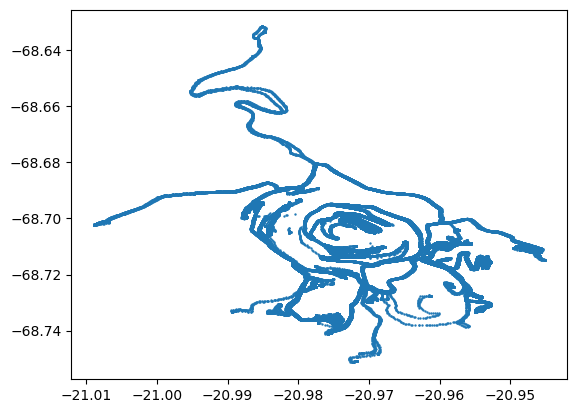

In [5]:
plt.scatter(x = df['Latitude_dd'], y = df['Longitude_dd'], s=0.5)

In [6]:
plot = df[['Longitude_dd','Latitude_dd']]

## Trajectory Construction

In [7]:
# Create Segments based on  RatioPayLoad
df[['phaseNb']] = df[['RatioPayload']].diff().abs().cumsum()

In [8]:
#Split the data into loaded trajectories and empty trajectories
segment_list = [data_phase for _, data_phase in df.groupby('phaseNb')]
empty_segment_list = []
load_segment_list = []

for segment in segment_list:
    if segment.RatioPayload.mean() == 0.0:
        empty_segment_list.append(segment)
    elif segment.RatioPayload.mean() == 1.0:
        load_segment_list.append(segment)

In [9]:
print(f'N° of Loaded segments :{len(load_segment_list)}')
print(f'N° of Empty segments :{len(empty_segment_list)}')

N° of Loaded segments :263
N° of Empty segments :263


<Axes: xlabel='Latitude_dd', ylabel='Longitude_dd'>

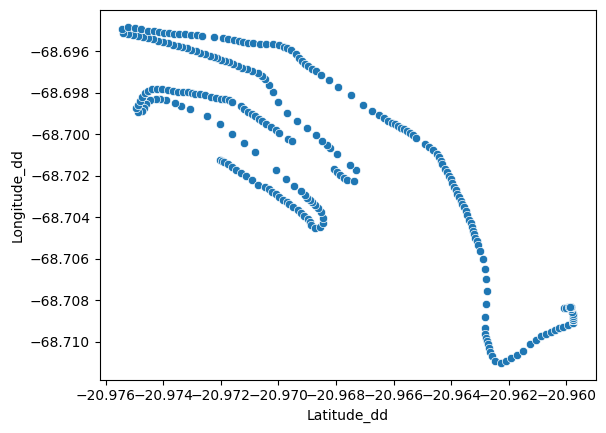

In [10]:
sns.scatterplot(x = load_segment_list[5]['Latitude_dd'],
                y = load_segment_list[5]['Longitude_dd'])

## 2. DATA ANALYSIS

Perform a comprehensive analysis of the dataset to uncover underlying patterns or characteristics. Visualize data distributions and relationships, such as speed vs. time, acceleration profiles, or geographical movements ... BE CURIOUS 

In [11]:
# ANALYSE THE MUTLIVARIATE TIME SERIES, TRY TO FIND PATTERNS AND CORRELATIONS INT THE DATA
# CHECK HOW THE DUMPER BEHAVES, SPEED, ACCELERATION, ... ETC

## 3. Distance Metrics for Trajectories 
Learn and apply suitable distance measures for trajectories. These may include Euclidean distance, Dynamic Time Warping (DTW), or Fréchet distance. Experiment with different metrics to find the most suitable one for clustering vehicle trajectories.
Trajectory Construction ( Based on the preprocessed data, construct trajectories that reflect the vehicle's movement over time. Define how you will represent a trajectory (e.g., as a series of time-stamped GPS coordinates or motion states).

## Analyse des cycles chargés et à vide

Cette section identifie les cycles complets entre la mine et le concasseur. Les données sont segmentées en utilisant la colonne **RatioPayload** :

- **RatioPayload ≈ 0** indique que le camion est à vide (phase de retour).
- **RatioPayload ≈ 1** indique que le camion est chargé (phase de transport).

Nous créons une colonne `phaseNb` en cumulant les changements de `RatioPayload` et nous séparons les segments en listes `load_segment_list` et `empty_segment_list`. Pour chaque segment, nous affichons des statistiques de base et traçons un exemple de trajet chargé vs à vide.

Nombre de segments chargés : 263
Nombre de segments à vide : 263


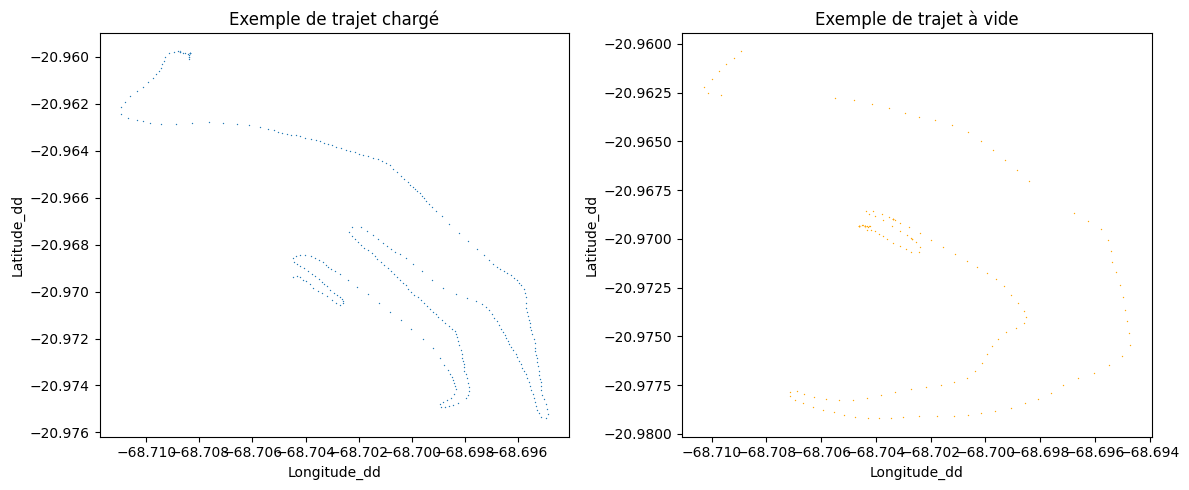

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Charger les données (assurez-vous que le fichier dataDumper.parquet se trouve dans le répertoire)
df = pd.read_parquet('dataDumper.parquet')

# Vérifier l'ordre chronologique si nécessaire
if 'Timestamp' in df.columns:
    df = df.sort_values('Timestamp', ascending=True)

# Créer un identifiant de phase basé sur la différence du RatioPayload
df['phaseNb'] = (df['RatioPayload'].diff().abs() > 0).cumsum()

# Séparer les segments en listes
segment_list = [segment for _, segment in df.groupby('phaseNb')]
load_segment_list = [seg for seg in segment_list if np.isclose(seg['RatioPayload'].mean(),1.0)]
empty_segment_list= [seg for seg in segment_list if np.isclose(seg['RatioPayload'].mean(),0.0)]

print(f"Nombre de segments chargés : {len(load_segment_list)}")
print(f"Nombre de segments à vide : {len(empty_segment_list)}")

# Exemple de visualisation d'un trajet chargé et d'un trajet à vide
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x=load_segment_list[0]['Longitude_dd'], y=load_segment_list[0]['Latitude_dd'], s=1, ax=ax[0])
ax[0].set_title('Exemple de trajet chargé')
sns.scatterplot(x=empty_segment_list[0]['Longitude_dd'], y=empty_segment_list[0]['Latitude_dd'], s=1, ax=ax[1], color='orange')
ax[1].set_title('Exemple de trajet à vide')
plt.tight_layout()


Segments chargés: 263
Segments à vide : 263


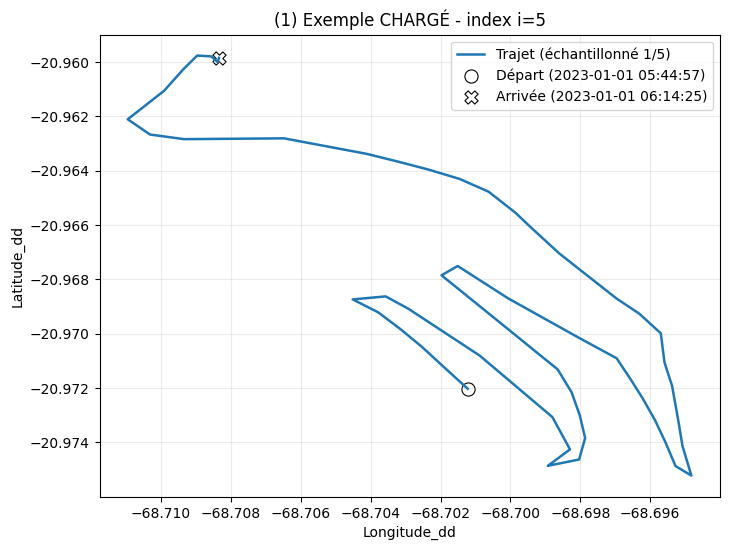

Infos -> points: 328 | durée: 29.5 min | longueur approx: 0.0643 (deg)


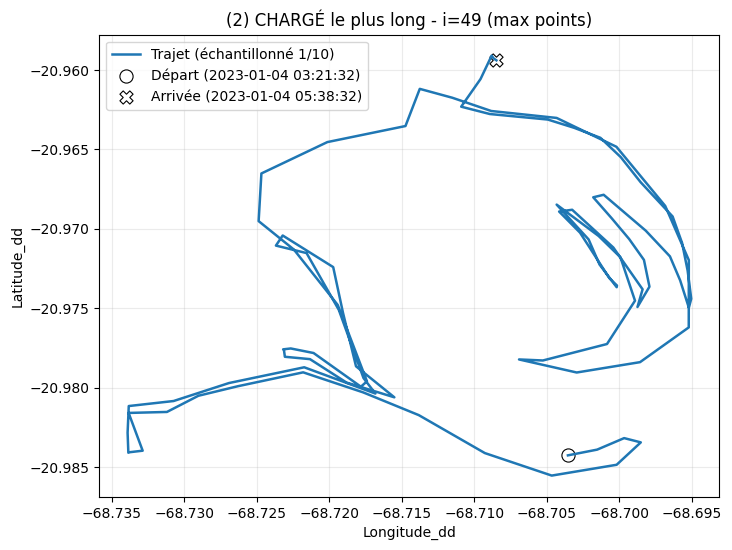

Infos -> points: 1644 | durée: 137.0 min | longueur approx: 0.2917 (deg)


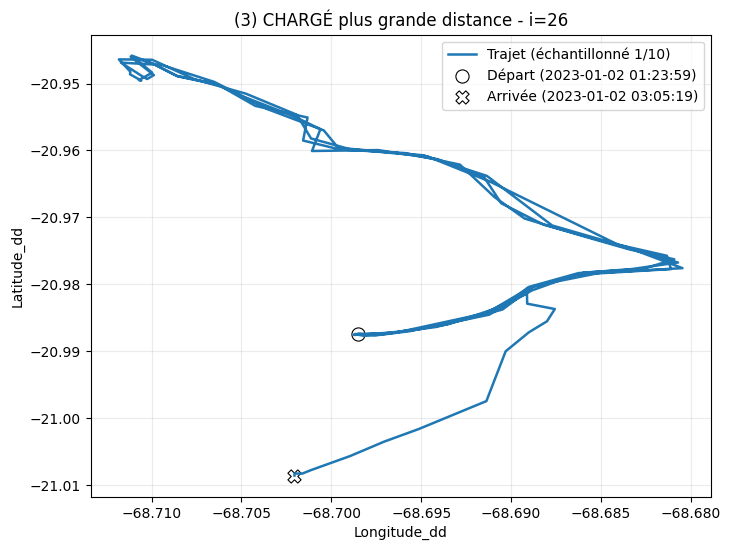

Infos -> points: 1203 | durée: 101.3 min | longueur approx: 0.3558 (deg)


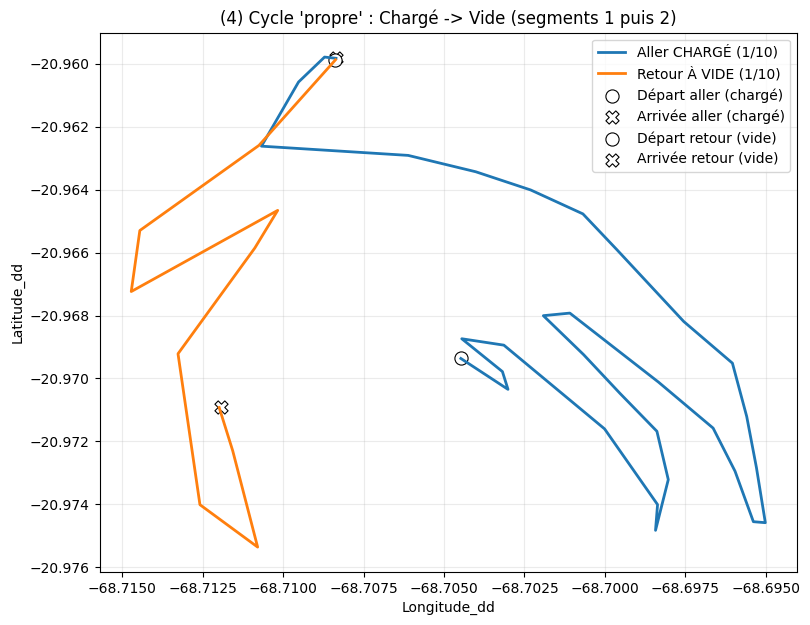

Aller chargé -> points: 321 | durée: 26.8 min | longueur: 0.0644
Retour vide  -> points: 126 | durée: 10.4 min | longueur: 0.0414


In [19]:
# =========================
# Trajets : 4 façons de choisir + affichage "points reliés"
# (1) aléatoire (ex: i=5 comme avant)
# (2) plus long (max nb de points)
# (3) plus grande "distance" (approx en degrés lat/lon)
# (4) cycle propre : un chargé + le segment juste après s'il est à vide
# =========================

import numpy as np
import matplotlib.pyplot as plt

# --- petites fonctions utilitaires ---
def path_length_deg(seg):
    """Longueur approx du chemin en degrés (suffit pour comparer entre segments)."""
    seg = seg.sort_values("Time_utc")
    dx = seg["Longitude_dd"].diff()
    dy = seg["Latitude_dd"].diff()
    return np.sqrt(dx*dx + dy*dy).sum()

def plot_segment(seg, title, color=None, downsample=5):
    """Trace un segment GPS en ligne + start/end + légende propre."""
    seg = seg.sort_values("Time_utc").reset_index(drop=True)

    # downsample pour rendre lisible
    if downsample and len(seg) > downsample:
        seg_plot = seg.iloc[::downsample].copy()
    else:
        seg_plot = seg

    t0 = pd.to_datetime(seg["Time_utc"].iloc[0])
    t1 = pd.to_datetime(seg["Time_utc"].iloc[-1])
    duration_min = (t1 - t0).total_seconds() / 60.0

    plt.figure(figsize=(8,6))
    plt.plot(seg_plot["Longitude_dd"], seg_plot["Latitude_dd"],
             "-", linewidth=1.8, label=f"Trajet (échantillonné 1/{downsample})" if downsample else "Trajet",
             color=color)
    plt.scatter(seg["Longitude_dd"].iloc[0], seg["Latitude_dd"].iloc[0],
                s=90, marker="o", edgecolors="black", linewidths=0.8,
                label=f"Départ ({t0.strftime('%Y-%m-%d %H:%M:%S')})", color="white")
    plt.scatter(seg["Longitude_dd"].iloc[-1], seg["Latitude_dd"].iloc[-1],
                s=90, marker="X", edgecolors="black", linewidths=0.8,
                label=f"Arrivée ({t1.strftime('%Y-%m-%d %H:%M:%S')})", color="white")

    plt.title(title)
    plt.xlabel("Longitude_dd")
    plt.ylabel("Latitude_dd")
    plt.legend(loc="best")
    plt.grid(True, alpha=0.25)
    plt.show()

    print(f"Infos -> points: {len(seg)} | durée: {duration_min:.1f} min | longueur approx: {path_length_deg(seg):.4f} (deg)")

# =========================
# 0) Vérifs rapides
# =========================
print(f"Segments chargés: {len(load_segment_list)}")
print(f"Segments à vide : {len(empty_segment_list)}")

# =========================
# 1) Exemple "aléatoire" (celui pris avant : i = 5)
# =========================
i = 5
seg_loaded = load_segment_list[i]
plot_segment(seg_loaded, title=f"(1) Exemple CHARGÉ - index i={i}", color=None, downsample=5)

# =========================
# 2) Segment le plus long (max nb de points)
# =========================
i_long = int(np.argmax([len(s) for s in load_segment_list]))
seg_loaded_long = load_segment_list[i_long]
plot_segment(seg_loaded_long, title=f"(2) CHARGÉ le plus long - i={i_long} (max points)", color=None, downsample=10)

# =========================
# 3) Segment avec plus grande "distance" (approx degrés)
# =========================
lengths = [path_length_deg(s) for s in load_segment_list]
i_dist = int(np.argmax(lengths))
seg_loaded_dist = load_segment_list[i_dist]
plot_segment(seg_loaded_dist, title=f"(3) CHARGÉ plus grande distance - i={i_dist}", color=None, downsample=10)

# =========================
# 4) Cycle propre : un segment CHARGÉ + le segment suivant si c'est un segment À VIDE
# =========================
# On repart de segment_list (tous segments) : on cherche un pattern Loaded -> Empty
def is_loaded(seg, eps=0.05):
    return seg["RatioPayload"].mean() >= 1.0 - eps

def is_empty(seg, eps=0.05):
    return seg["RatioPayload"].mean() <= eps

cycle_idx = None
for k in range(len(segment_list)-1):
    if is_loaded(segment_list[k]) and is_empty(segment_list[k+1]):
        cycle_idx = k
        break

if cycle_idx is None:
    print("⚠️ Aucun cycle Loaded -> Empty trouvé avec ces seuils (eps=0.05). Ajuste eps si besoin.")
else:
    seg_L = segment_list[cycle_idx]
    seg_E = segment_list[cycle_idx+1]

    # plot sur la même figure pour comparer
    seg_L = seg_L.sort_values("Time_utc").reset_index(drop=True)
    seg_E = seg_E.sort_values("Time_utc").reset_index(drop=True)

    # downsample pour lisibilité
    ds = 10
    seg_Lp = seg_L.iloc[::ds]
    seg_Ep = seg_E.iloc[::ds]

    plt.figure(figsize=(9,7))
    plt.plot(seg_Lp["Longitude_dd"], seg_Lp["Latitude_dd"], "-", linewidth=2.0, label="Aller CHARGÉ (1/10)")
    plt.plot(seg_Ep["Longitude_dd"], seg_Ep["Latitude_dd"], "-", linewidth=2.0, label="Retour À VIDE (1/10)")

    # points départ/arrivée des deux
    plt.scatter(seg_L["Longitude_dd"].iloc[0], seg_L["Latitude_dd"].iloc[0],
                s=90, marker="o", edgecolors="black", linewidths=0.8, label="Départ aller (chargé)", color="white")
    plt.scatter(seg_L["Longitude_dd"].iloc[-1], seg_L["Latitude_dd"].iloc[-1],
                s=90, marker="X", edgecolors="black", linewidths=0.8, label="Arrivée aller (chargé)", color="white")

    plt.scatter(seg_E["Longitude_dd"].iloc[0], seg_E["Latitude_dd"].iloc[0],
                s=90, marker="o", edgecolors="black", linewidths=0.8, label="Départ retour (vide)", color="white")
    plt.scatter(seg_E["Longitude_dd"].iloc[-1], seg_E["Latitude_dd"].iloc[-1],
                s=90, marker="X", edgecolors="black", linewidths=0.8, label="Arrivée retour (vide)", color="white")

    plt.title(f"(4) Cycle 'propre' : Chargé -> Vide (segments {cycle_idx} puis {cycle_idx+1})")
    plt.xlabel("Longitude_dd")
    plt.ylabel("Latitude_dd")
    plt.legend(loc="best")
    plt.grid(True, alpha=0.25)
    plt.show()

    # infos
    t0L, t1L = pd.to_datetime(seg_L["Time_utc"].iloc[0]), pd.to_datetime(seg_L["Time_utc"].iloc[-1])
    t0E, t1E = pd.to_datetime(seg_E["Time_utc"].iloc[0]), pd.to_datetime(seg_E["Time_utc"].iloc[-1])
    print(f"Aller chargé -> points: {len(seg_L)} | durée: {(t1L-t0L).total_seconds()/60:.1f} min | longueur: {path_length_deg(seg_L):.4f}")
    print(f"Retour vide  -> points: {len(seg_E)} | durée: {(t1E-t0E).total_seconds()/60:.1f} min | longueur: {path_length_deg(seg_E):.4f}")


## Comparaison des types de trajets

Dans cette section, nous comparons les caractéristiques des trajectoires en fonction de leur état (chargé ou à vide) et de leur topographie. On calcule :

- la distance parcourue sur chaque segment
- le dénivelé moyen et maximal
- la durée

On crée ensuite un graphique comparant les paramètres moyens pour les segments chargés et à vide.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_27964\2130711919.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_27964\2130711919.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_27964\2130711919.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_27964\2130711919.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old n

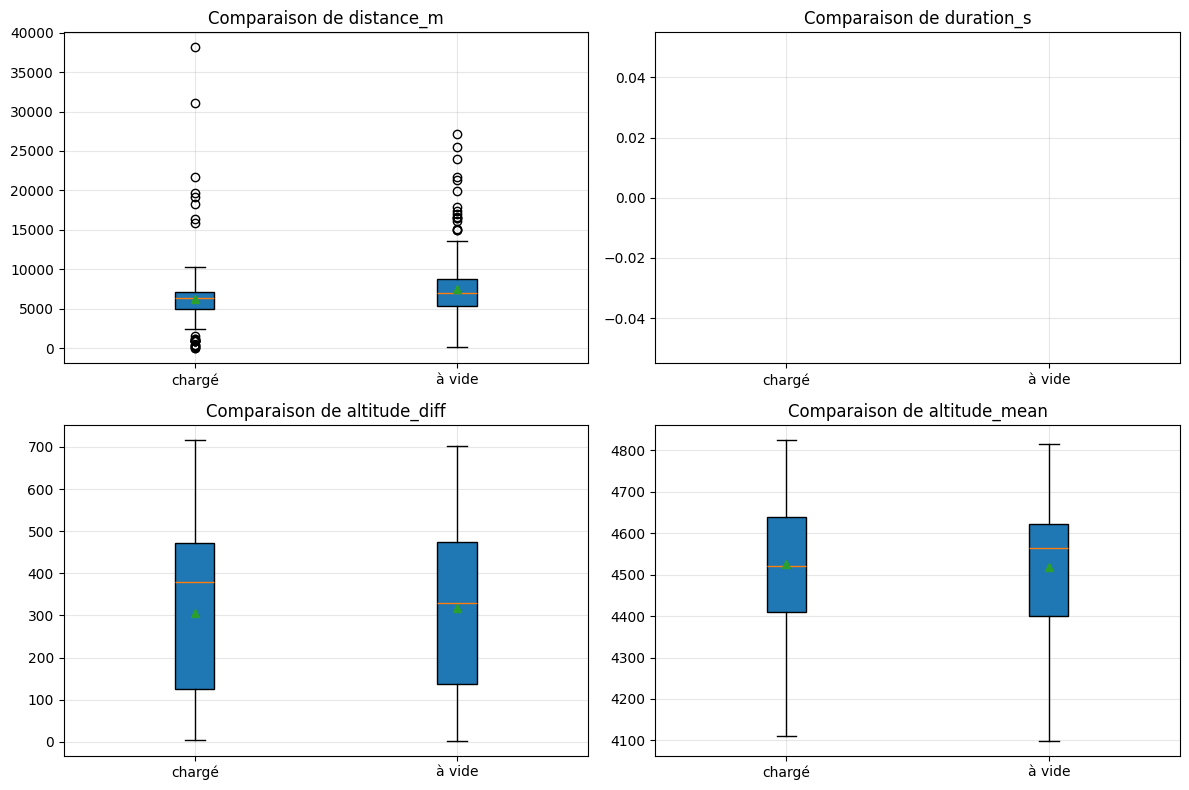

In [24]:
# =========================
# BOXPLOTS robustes (matplotlib) - ne modifie pas all_stats
# =========================

import numpy as np
import matplotlib.pyplot as plt

cols = ["distance_m", "duration_s", "altitude_diff", "altitude_mean"]
order = ["chargé", "à vide"]

# copie locale uniquement pour plot
df_plot = all_stats[["type"] + cols].copy()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(cols):
    r, c = divmod(i, 2)
    ax = axes[r, c]

    data = []
    labels = []
    for t in order:
        vals = df_plot.loc[df_plot["type"] == t, col].dropna().values
        data.append(vals)
        labels.append(t)

    bp = ax.boxplot(
        data,
        labels=labels,
        patch_artist=True,
        showmeans=True
    )

    ax.set_title(f"Comparaison de {col}")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Analyse comportementale du conducteur

Cette partie explore la conduite du camion en regardant les vitesses et accélérations. On crée des indicateurs d'accélération et on recherche des comportements agressifs vs doux.

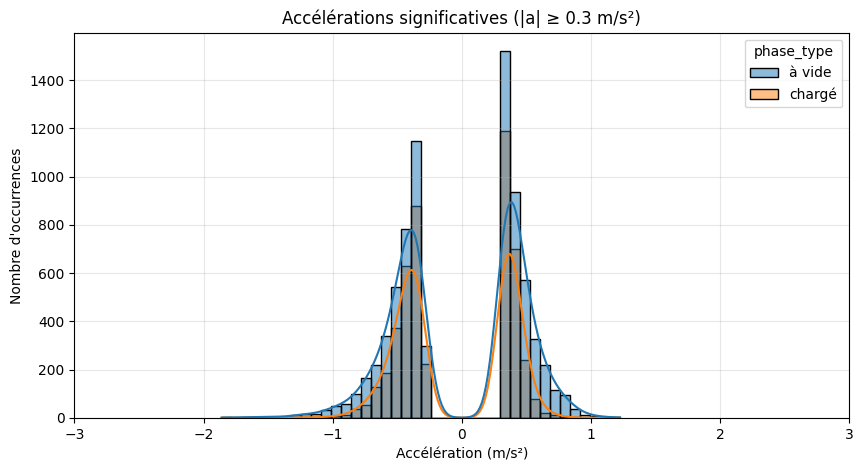

,count,mean,max
phase_type,,,
chargé,4782,0.419021,1.532631
à vide,7633,0.468932,1.860559


In [ ]:
# =========================
# Analyse conducteur - version lisible
# Focus sur accélérations significatives
# =========================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seuil pour ignorer les micro-variations
THRESH = 0.3  # m/s²

df_plot = df_plot = df_tmp.copy()
df_plot["abs_acc"] = df_plot["acceleration"].abs()

# on garde seulement les événements "significatifs"
df_plot = df_plot[
    (df_plot["abs_acc"] >= THRESH) &
    (~df_plot["phase_type"].isna())
]

plt.figure(figsize=(10,5))

sns.histplot(
    data=df_plot,
    x="acceleration",
    hue="phase_type",
    bins=40,
    kde=True,
    common_norm=False
)

plt.title("Accélérations significatives (|a| ≥ 0.3 m/s²)")
plt.xlabel("Accélération (m/s²)")
plt.ylabel("Nombre d'occurrences")
plt.xlim(-3, 3)
plt.grid(True, alpha=0.3)
plt.show()

# =========================
# Indicateur quantitatif simple
# =========================
summary = (
    df_plot
    .groupby("phase_type")["abs_acc"]
    .agg(["count", "mean", "max"])
)

summary



 #On voit clairement que le comportement du conducteur n’est pas le même selon que le camion est chargé ou à vide.
 # À vide, il y a plus d’accélérations et de freinages forts, et ils sont aussi plus intenses.
 # À l’inverse, quand le camion est chargé, la conduite est plus douce et plus stable.
 # C’est logique : le véhicule est plus lourd et le conducteur prend moins de risques.
 # Ce comportement peut avoir un impact sur les pneus, car des accélérations et freinages plus agressifs peuvent augmenter les contraintes et l’usure.


## Clustering de trajectoires et comparaison de distances

Nous testons différentes métriques de distance pour comparer les trajectoires :

- Distance euclidienne sur les coordonnées (x,y) interpolées
- Distance DTW (Dynamic Time Warping)

On effectue un clustering sur un sous-ensemble de segments pour chaque distance et on compare la cohérence des clusters.

Labels Euclidien/Ward: [1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1]


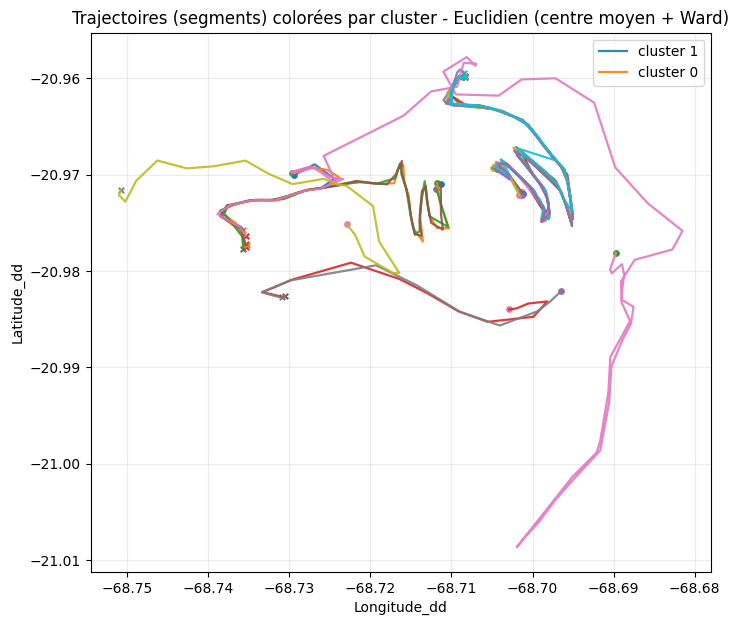

Calcul matrice DTW...


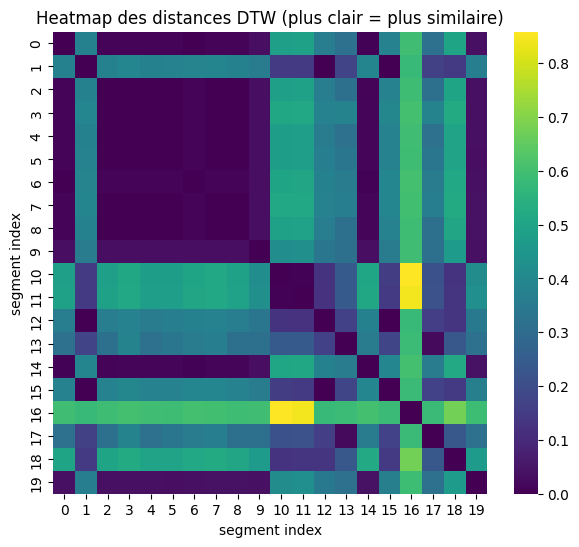

Labels DTW: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


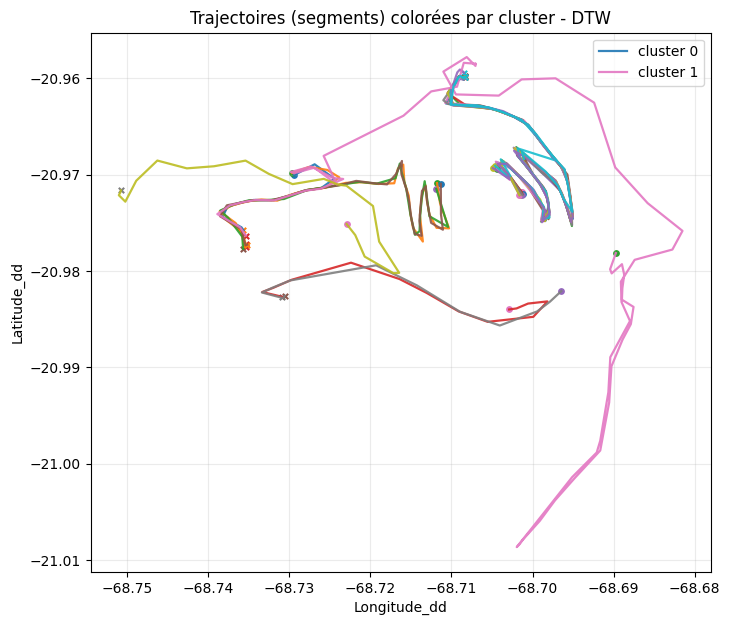

Cluster DTW le plus petit = 1 | indices: [16]


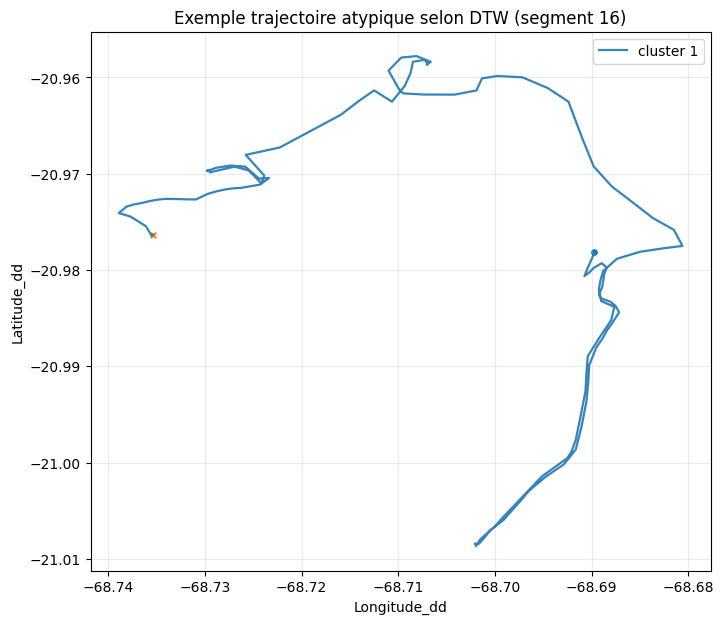

In [30]:
# =========================
# Clustering Euclidien vs DTW + VISU (heatmap + trajectoires colorées)
# =========================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from tslearn.metrics import cdist_dtw

# --------- utils ----------
def trajectory_to_array(seg):
    # (lat, lon) dans le bon ordre
    return seg[["Latitude_dd", "Longitude_dd"]].values

def plot_trajectories_by_cluster(segments, labels, title, downsample=10):
    plt.figure(figsize=(8, 7))
    for seg, lab in zip(segments, labels):
        s = seg.sort_values("Time_utc") if "Time_utc" in seg.columns else seg
        if downsample and len(s) > downsample:
            s = s.iloc[::downsample]
        plt.plot(s["Longitude_dd"], s["Latitude_dd"], "-", linewidth=1.6, alpha=0.9, label=f"cluster {lab}")
        # start / end (petits marqueurs)
        plt.scatter(s["Longitude_dd"].iloc[0], s["Latitude_dd"].iloc[0], s=15, marker="o")
        plt.scatter(s["Longitude_dd"].iloc[-1], s["Latitude_dd"].iloc[-1], s=15, marker="x")

    # légende propre (évite 20 fois "cluster 0")
    handles, labs = plt.gca().get_legend_handles_labels()
    uniq = {}
    for h, l in zip(handles, labs):
        if l not in uniq:
            uniq[l] = h
    plt.legend(uniq.values(), uniq.keys(), loc="best")

    plt.title(title)
    plt.xlabel("Longitude_dd")
    plt.ylabel("Latitude_dd")
    plt.grid(True, alpha=0.25)
    plt.show()

# -------------------------
# 0) Sous-ensemble de segments
# -------------------------
N_SEG = 20
segments_subset = load_segment_list[:N_SEG]

traj_arrays = np.array([trajectory_to_array(seg) for seg in segments_subset], dtype=object)

# -------------------------
# 1) Clustering "Euclidien" (Ward)
# => Ward impose euclidien, MAIS il lui faut des vecteurs de même taille.
# On utilise donc une représentation simple : (lat_moy, lon_moy) par trajet.
# -------------------------
traj_centers = np.stack([t.mean(axis=0) for t in traj_arrays])  # shape (N, 2)

cluster_euc = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels_euc = cluster_euc.fit_predict(traj_centers)

print("Labels Euclidien/Ward:", labels_euc)

# VISU Euclidien : trajectoires colorées
plot_trajectories_by_cluster(
    segments_subset, labels_euc,
    title="Trajectoires (segments) colorées par cluster - Euclidien (centre moyen + Ward)",
    downsample=10
)

# -------------------------
# 2) Clustering DTW (distance pré-calculée)
# -------------------------
print("Calcul matrice DTW...")
dtw_dist = cdist_dtw(traj_arrays)

# VISU 1 : Heatmap matrice DTW
plt.figure(figsize=(7, 6))
sns.heatmap(dtw_dist, cmap="viridis")
plt.title("Heatmap des distances DTW (plus clair = plus similaire)")
plt.xlabel("segment index")
plt.ylabel("segment index")
plt.show()

cluster_dtw = AgglomerativeClustering(n_clusters=2, metric="precomputed", linkage="average")
labels_dtw = cluster_dtw.fit_predict(dtw_dist)

print("Labels DTW:", labels_dtw)

# VISU 2 : trajectoires colorées par cluster DTW
plot_trajectories_by_cluster(
    segments_subset, labels_dtw,
    title="Trajectoires (segments) colorées par cluster - DTW",
    downsample=10
)

# -------------------------
# 3) Bonus : afficher les outliers DTW (si un cluster est tout petit)
# -------------------------
counts = np.bincount(labels_dtw)
small_cluster = np.argmin(counts)
outliers = np.where(labels_dtw == small_cluster)[0]

print(f"Cluster DTW le plus petit = {small_cluster} | indices:", outliers.tolist())

if len(outliers) > 0:
    idx = int(outliers[0])
    plot_trajectories_by_cluster(
        [segments_subset[idx]], [labels_dtw[idx]],
        title=f"Exemple trajectoire atypique selon DTW (segment {idx})",
        downsample=5
    )


## Détection d'anomalies (pression et température)

Cette partie met en place des indicateurs pour détecter des anomalies liées à la pression des pneus et à la température du camion. Nous calculons une feature *Intensité* et recherchons les pics de température et les baisses de pression.

In [ ]:
# Calcul de l'intensité si les colonnes nécessaires existent
if {'Speed_mps', 'RatioPayload', 'Temperature_K'}.issubset(df.columns):
    df['Intensite'] = df['Speed_mps'] * df['RatioPayload']
    from sklearn.preprocessing import MinMaxScaler
    sub_df = df[['Intensite','Temperature_K']].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(sub_df)
    sub_df[['Intensite_scaled','Temperature_scaled']] = scaled
    plt.figure(figsize=(12,5))
    plt.plot(sub_df['Intensite_scaled'], label='Intensité (normalisée)')
    plt.plot(sub_df['Temperature_scaled'], label='Temperature_K (normalisée)')
    plt.legend()
    plt.title('Comparaison Intensité vs Température normalisées')
    plt.show()

# Détection des anomalies de pression
pressure_cols = [c for c in df.columns if 'Pressure_Pa' in c and 'Cold' not in c]
if pressure_cols:
    pneu_col = pressure_cols[0]
    plt.figure(figsize=(12,4))
    plt.plot(df[pneu_col].iloc[:1000])
    plt.title(f'Evolution de la pression {pneu_col} sur 1000 points')
    plt.xlabel('Index')
    plt.ylabel('Pression (Pa)')
    plt.show()
    df['pressure_diff'] = df[pneu_col].diff()
    anomalies_bruit = df[df['pressure_diff'] < -5e5]  # Seuil arbitraire à ajuster
    print(f"Nombre d'anomalies de chute brutale de pression: {len(anomalies_bruit)}")


## Analyse temporelle et changements de zone d'extraction

En segmentant les données par semaine ou par jour, on observe les variations des clusters dans le temps. Cela peut révéler des changements de zone d'extraction ou de conditions météorologiques. Nous comparons les moyennes hebdomadaires de vitesse, de charge et d'intensité.

In [18]:
# Statistiques hebdomadaires
affected_cols = ['Speed_mps','RatioPayload']
if 'Intensite' in df.columns:
    affected_cols.append('Intensite')

if 'Timestamp' in df.columns:
    df['week'] = df['Timestamp'].dt.isocalendar().week
    weekly_stats = df.groupby('week')[affected_cols].mean().reset_index()
    plt.figure(figsize=(10,5))
    for col in affected_cols:
        plt.plot(weekly_stats['week'], weekly_stats[col], label=col)
    plt.xlabel('Semaine')
    plt.ylabel('Moyenne')
    plt.legend()
    plt.title('Evolution hebdomadaire des moyennes')
    plt.show()
